<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Module 2
:</span> Data Cleaning</h1>
<hr>
Welcome to the workbook for <span style="color:royalblue">Module 2: Data Cleaning</span>! 

Better data beats better algorithms.
* Use this as a "blueprint" for efficient data cleaning.
* Different types of data will require different types of cleaning.
* However, the systematic approach laid out in this module can always be a good starting point.


<br><hr id="toc">

### In this module...

In this module, we'll cover the essential data cleaning steps:
1. [Drop unwanted observations](#drop)
2. [Fix structural errors](#structural)
3. [Remove unwanted outliers](#outliers)
4. [Label missing categorical data](#missing-categorical)
5. [Flag and fill missing numerical data](#missing-numeric)

Finally, we'll save the cleaned dataframe to a new file so we can use it in other modules.

<br><hr>

### First, let's import libraries and load the dataset.

In general, it's good practice to keep all of your library imports at the top of your notebook or program.

Before we do anything else, let's import the <code style="color:steelblue">print()</code> function from the future to ensure our code is compatible with Python 3.

In [1]:
from __future__ import print_function  # Compatability with Python 3
print( 'Print function ready to serve.' )

Print function ready to serve.


Next, let's import the libraries we'll need for this module.

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 100)

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

Next, let's import the dataset, just as we did in the previous module.

In [33]:
df = pd.read_csv('project_files/real_estate_data.csv')

1220551

Now we're ready to jump into cleaning the data!

<br id="drop">
# 1. Drop unwanted observations

The first step to data cleaning is removing unwanted observations from your dataset.

<br>
First, drop duplicates in your dataframe.

In [9]:
# Drop duplicates
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(1883, 26)
(1883, 26)


The dataset has already been filtered to only relevant samples, so we don't need to remove any irrelevant samples.

<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>

<br id="structural">
# 2. Fix structural errors

The next bucket under data cleaning involves fixing structural errors. 

<br>
First, display the unique values of the <code style="color:steelblue">'basement'</code> feature.

In [12]:
# Display unique values of 'basement'
df['basement'].unique()

array([ nan,   1.])

Fill missing <code style="color:steelblue">'basement'</code> values with the value <code style="color:crimson">0</code> to turn <code style="color:steelblue">'basement'</code> into a true indicator variable.

In [48]:
# Missing basement values should be 0
df.basement = df.basement.fillna(0)

Confirm that we have a true indicator variable:

In [16]:
# Display unique values of 'basement'
df.basement.value_counts()

1.0    1657
0.0     226
Name: basement, dtype: int64

Next, to check for typos or inconsistent capitalization, display all the class distributions for the <code style="color:steelblue">'roof'</code> feature.

In [46]:
# Class distributions for 'roof'
df.roof.unique()
 



array([nan, 'Composition Shingle', 'Other', 'Gravel/Rock',
       'Roll Composition', 'Asphalt', 'Slate', 'Shake Shingle', 'Built-up',
       'Asbestos', 'Metal', 'Wood Shake/ Shingles', 'Composition'], dtype=object)

Make these changes:
* <code style="color:crimson">'composition'</code> should be <code style="color:crimson">'Composition'</code>
* <code style="color:crimson">'asphalt'</code> should be <code style="color:crimson">'Asphalt'</code>
* <code style="color:crimson">'shake-shingle'</code> should be <code style="color:crimson">'Shake Shingle'</code>
* We also might as well change <code style="color:crimson">'asphalt,shake-shingle'</code> to <code style="color:crimson">'Shake Shingle'</code>

In [45]:
# 'composition' should be 'Composition'
df.roof.replace(to_replace='composition', value= 'Composition', inplace=True)

# 'asphalt' should be 'Asphalt'
df.roof.replace(to_replace='asphalt', value= 'Asphalt', inplace=True)


# 'shake-shingle' and 'asphalt,shake-shingle' should be 'Shake Shingle'
df.roof.replace(to_replace=['shake-shingle', 'asphalt,shake-shingle'], value = 'Shake Shingle', inplace=True)



Finally, we'll check for mislabeled classes. Plot the class distributions for <code style="color:steelblue">'exterior_walls'</code>.

In [47]:
# Class distributions for 'exterior_walls'
df.exterior_walls.unique()

array(['Wood Siding', 'Brick', 'Concrete Block', 'Wood',
       'Siding (Alum/Vinyl)', 'Stucco', 'Concrete', 'Block', nan, 'Metal',
       'Wood Shingle', 'Masonry', 'Brick veneer', 'Other', 'Combination',
       'Asbestos shingle', 'Rock, Stone'], dtype=object)

Let's fix these in the next exercise:
* <code style="color:crimson">'Rock, Stone'</code> should be <code style="color:crimson">'Masonry'</code>
* <code style="color:crimson">'Concrete'</code> and <code style="color:crimson">'Block'</code> should both just be <code style="color:crimson">'Concrete Block'</code>

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 2.1</span>

**First, replace any instances of <code style="color:steelblue">'Rock, Stone'</code> with <code style="color:steelblue">'Masonry'</code> instead.**
* Remember to do it inplace.

In [11]:
# 'Rock, Stone' should be 'Masonry'
df.exterior_walls.replace(to_replace='Rock, Stone', value = 'Masonry', inplace=True)

**Next, replace any instances of <code style="color:steelblue">'Concrete'</code> or <code style="color:steelblue">'Block'</code> with <code style="color:steelblue">'Concrete Block'</code> instead.**
* Remember to do it inplace.

In [13]:
# 'Concrete' and 'Block' should be 'Concrete Block'
df.exterior_walls.replace(['Concrete','Block'],'Concrete Block', inplace=True)

**Finally, plot the bar plot of <code style="color:steelblue">'exterior_walls'</code> to see its new distribution.**

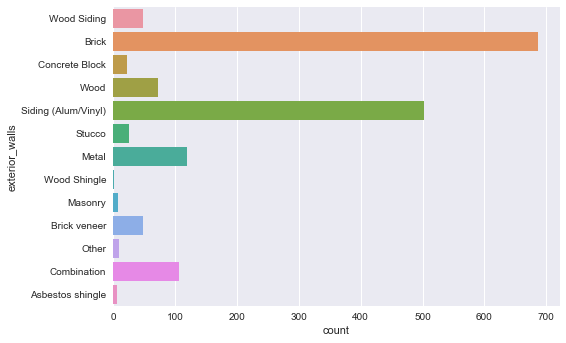

In [14]:
# Class distributions for 'exterior_walls'
sns.countplot(y = 'exterior_walls', data = df)

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">

<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>

<br id="outliers">
# 3. Remove unwanted outliers

Outliers can cause problems with certain types of models.

<br>
Start with a box plot of your target variable, since that's the variable that you're actually trying to predict.

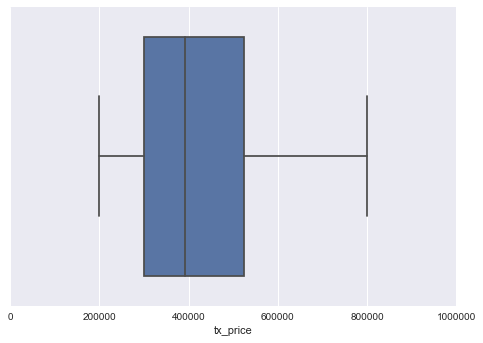

In [20]:
# Box plot of 'tx_price' using the Seaborn library
sns.boxplot(df.tx_price)
plt.xlim(0,1000000)
plt.show()

To show more information, make violin plot of transaction price. 
* What's the difference between box plots and violin plots?

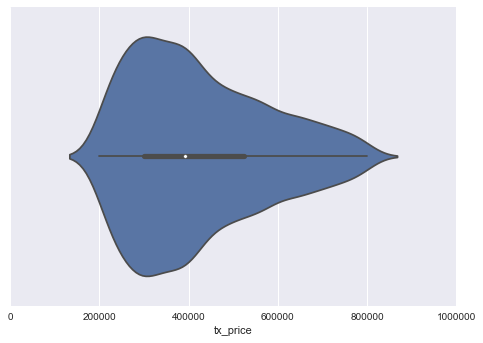

In [24]:
# Violin plot of 'tx_price' using the Seaborn library
sns.violinplot(df.tx_price)
plt.xlim(0,1000000)
plt.show()

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 2.2</span>

**Plot the violin plots for <code style="color:steelblue">'beds'</code>, <code style="color:steelblue">'sqft'</code>, and <code style="color:steelblue">'lot_size'</code>.**
* **Tip:** If you want to plot multiple charts in the same code cell, remember to separate them by <code style="color:steelblue">plt.show()</code>, or else they will overlap.

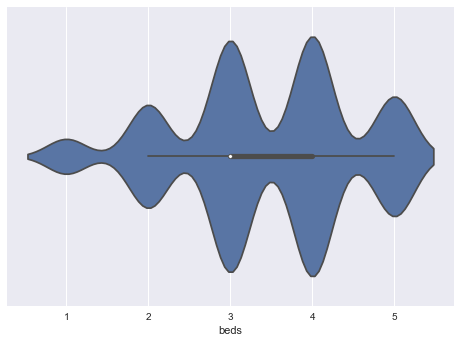

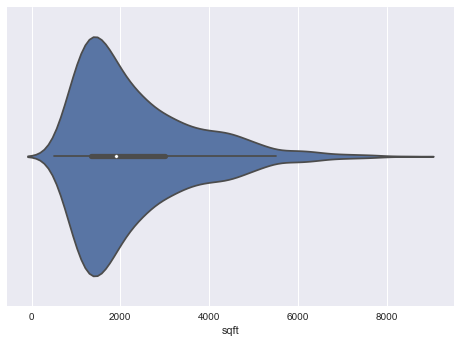

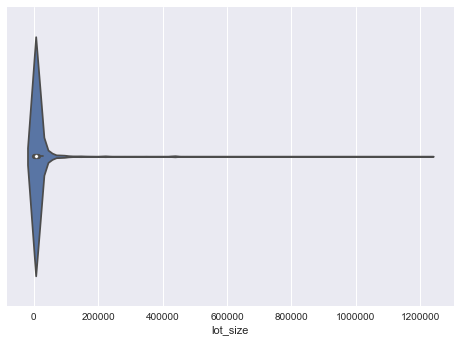

In [25]:
# Violin plot of beds


# Violin plot of sqft


# Violin plot of lot_size
for variables in ['beds', 'sqft', 'lot_size']:
    sns.violinplot('{}'.format(variables), data = df)
    plt.show()



Among those three features, it looks like <code style="color:steelblue">lot_size</code> has a potential outlier! 
* Look at its long and skinny tail.
* Let's look at the largest 5 lot sizes just to confirm.

<br>
**Sort <code style="color:steelblue">df.lot_size</code> and display the top 5 samples.**
* You can sort a Series with the <code style="color:steelblue">.sort_values()</code> function.
* **Tip:** <code style="color:steelblue">.sort_values()</code> has an argument called <code style="color:steelblue">ascending=</code>. By default, it's <code style="color:steelblue">True</code>
* **Tip:** You can chain functions together. This exercise can be completed in 1 line of code.

In [26]:
# Sort df.lot_size and display the top 5 samples
df.lot_size.sort_values(ascending = False).head()

102     1220551
1111     436471
1876     436035
1832     436035
1115     435600
Name: lot_size, dtype: int64

The largest property has a lot_size of 1,220,551 sqft. The next largest has a lot_size of only 436,471 sqft. Holy smokes!

Because it's unlikely the REIT will ever invest in properties with lots that large, and because it's the only one in the dataset, let's remove it so it doesn't interfere with our ability to model normal size properties.

<br>
**Remove observations with <code style="color:steelblue">lot_size</code> greater than 500,000 sqft.**
* You can use a boolean mask to do so (filter to keep only wanted observations)
* Overwrite the existing <code style="color:steelblue">df</code> object
* Print the length of the new <code style="color:steelblue">df</code> object.

In [30]:
# Remove lot_size outliers
df = df[df.lot_size != max(df.lot_size)]

# print length of df
df.shape

(1882, 26)

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">

<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>

<br id="missing-categorical">
# 4. Label missing categorical data

It's finally time to address missing data.

<br>
First, find and count the missing categorical data.

In [42]:
# Display number of missing values by feature (categorical)
df.select_dtypes(include = [np.object]).isnull().sum()


property_type       0
exterior_walls    223
roof              354
dtype: int64

In the next exercise, we'll write a loop for labeling missing values in all of our categorical features.

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 2.3</span>

**Write a loop that fills all the missing values for categorical features with the value <code style="color:steelblue">'Missing'</code>.**
* **Tip:** There's a shortcut for looping through categorical column names:


<pre style="color:#bbb">
for column in <strong style="color:steelblue">df.select_dtypes(include=['object'])</strong>:
    # code block
</pre>

In [45]:
# Fill missing categorical values
for column in df.select_dtypes(include = [np.object]):
    df['{}'.format(column)] = df['{}'.format(column)].fillna('Missing')


**Now, display the number of missing values for each categorical feature.**

In [46]:
# Display number of missing values by feature (categorical)
df.select_dtypes(include=[np.object]).isnull().sum()


property_type     0
exterior_walls    0
roof              0
dtype: int64

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">

<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>

<br id="missing-numeric">
# 5. Flag and fill missing numeric data

Finally, let's flag and fill missing numeric data.

<br>
First, let's find and count missing values in numerical feature.

In [49]:
# Display number of missing values by feature (numeric)
df.select_dtypes(exclude = [np.object, np.bool]).isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

Well, it looks like we don't have any numerical features with missing values in this dataset.

No problem, we'll practice flagging and filling missing numerical values in the next project!

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[**Back to Contents**](#toc)
</div>

<br>
### Finally, let's save the cleaned dataframe.

Before we move on to the next module, let's save the new dataframe we worked hard to clean.
* We'll use Pandas's <code style="color:steelblue">.to_csv()</code> function.
* We set <code style="color:steelblue">index=<span style="color:crimson">None</span></code> so that Pandas drops the indices and only stores the actual data in the CSV.

In [50]:
# Save cleaned dataframe to new file
df.to_csv('cleaned_df.csv', index = None)

Now we can use <code style="color:steelblue">'cleaned_df.csv'</code> in all the other modules!

<br>
## Next Steps

Congratulations for making through Project 2's Data Cleaning module!

As a reminder, here are a few things you did in this module:
* You confirmed that the dataset doesn't have any duplicate and irrelevant observations.
* You fixed various structural errors, such as mislabeled classes.
* You removed an outlier after plotting violin plots.
* And you labeled missing data in your categorical features.

All of this cleaning will be extremely helpful for the remaining modules. In the next module, <span style="color:royalblue">Module 3: Feature Engineering</span>, you'll use your cleaned dataset to create new features that will improve model performance.

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[**Back to Contents**](#toc)
</div>